In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
print(mpl.get_cachedir())
import matplotlib.font_manager as fm

#from matplotlib import rc
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

C:\Users\nico-\.matplotlib


In [2]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['font.size'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['legend.frameon'] = False
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern Roman']
# Specify the path to the Computer Modern font file on your system
#cm_font_path = 'H:\.cache\matplotlib\computer-modern\cmunbi.ttf'

# Check if the specified font file exists
#if fm.findfont('Computer Modern Roman', fontext='ttf') is None:
    #plt.rcParams['font.family'] = 'serif'
    #plt.rcParams['font.serif'] = ['Computer Modern Roman']


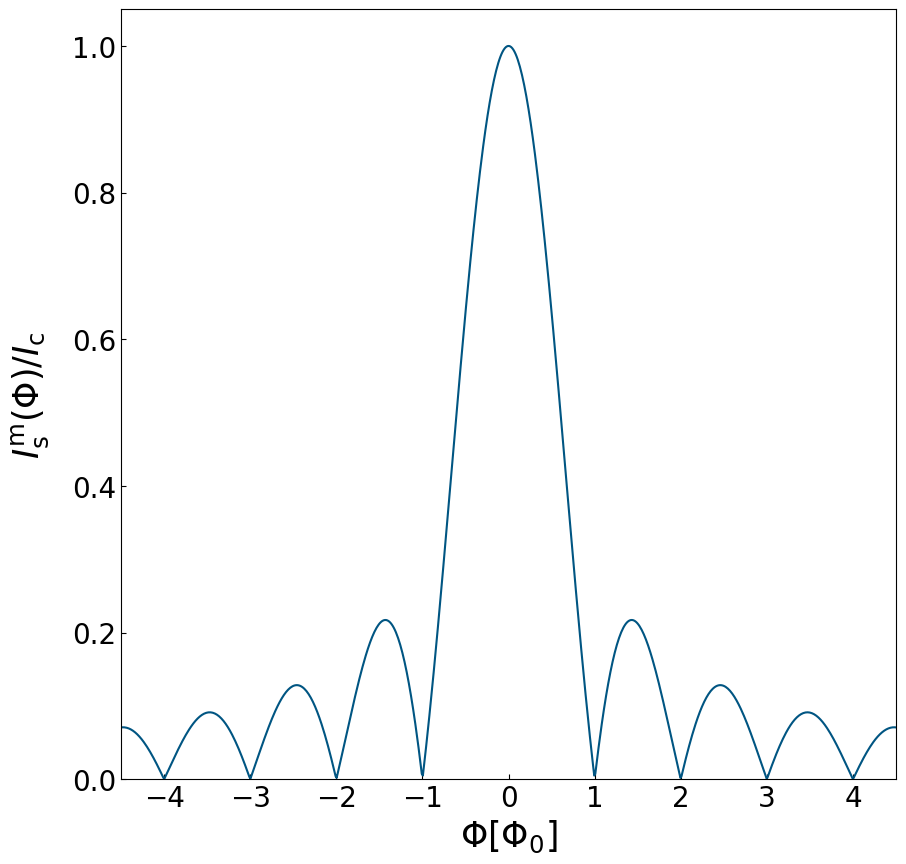

In [3]:
#fraunhofer

phi0 = 2e-15
phi = np.linspace(-5,5,800)*2e-15
def y(phi):
    return np.abs(np.sin(np.pi*phi/phi0)/(np.pi*phi/phi0))

f, ax = plt.subplots()

ax.plot(phi/phi0, y(phi), color='#005582')
ax.set_xlim(-4.5,4.5)
ax.set_xlabel('$\Phi[\Phi_0]$')
ax.set_ylim(0,1.05)
ax.yaxis.set_label_coords(-0.09, 0.48)
ax.set_ylabel(r'$I_{\rm s}^{\rm m}(\Phi)/I_{\rm c}$')
#ax.set_title('Fraunhofer')
plt.savefig('fraunhofer.pdf')
plt.show()

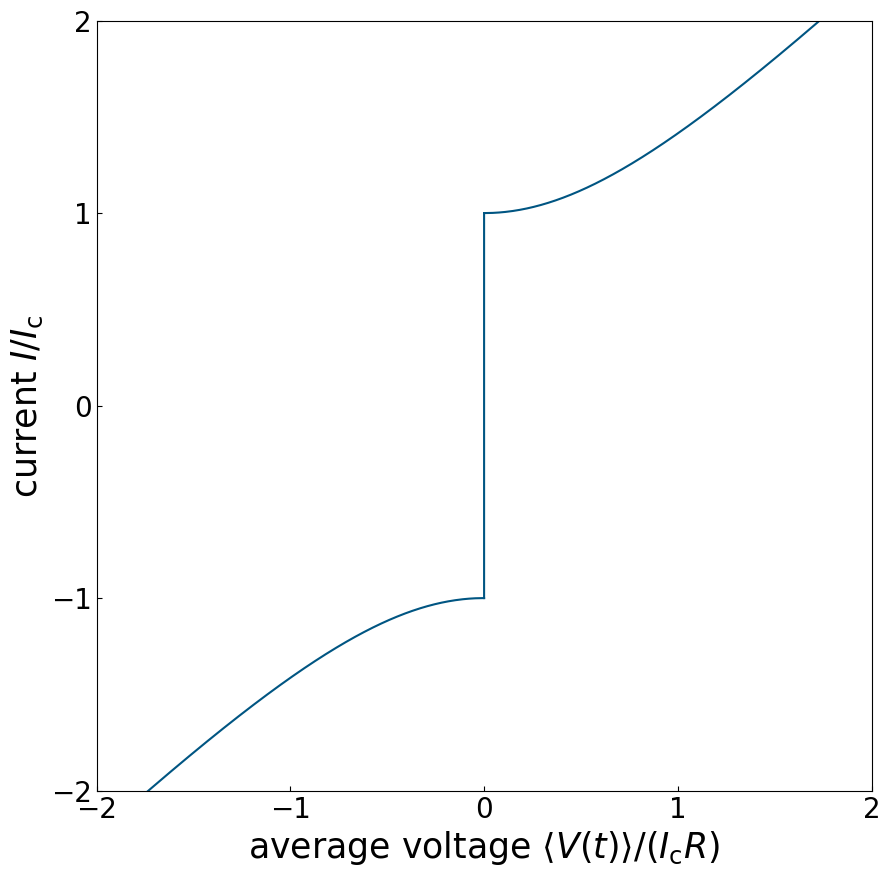

In [4]:
Ic=6e-6
R=200
I=np.linspace(6e-6, 18e-6, 2000)
i=np.linspace(-1,1,2000)

V0 = np.zeros_like(i)

def V_overdamped(I):
    return Ic*R*np.sqrt((I/Ic)**2-1)
    
plt.plot(V_overdamped(I)/(Ic*R),I/Ic, color='#005582')
plt.plot(-V_overdamped(I)/(Ic*R),-I/Ic, color='#005582')
plt.plot(V0,i, color='#005582')
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.xlabel(r'average voltage $\langle V(t) \rangle/(I_{\rm c}R)$')
plt.ylabel(r'current $I/I_{\rm c}$')
plt.xticks(np.arange(-2,3,1))
plt.yticks(np.arange(-2,3,1))
plt.savefig('JJoverdamped.pdf')
plt.show()

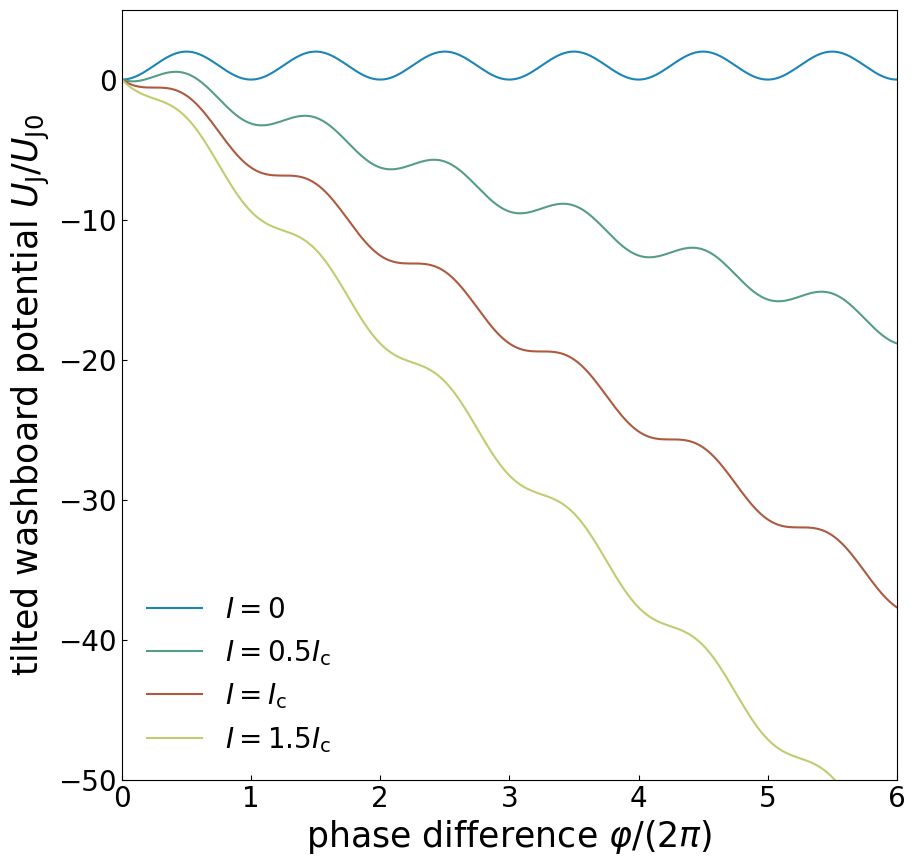

In [5]:
#washboard


phi2=np.linspace(0,300,2000)
def wash0(phi):
    return 1-np.cos(phi)#-1.5*phi

def wash05(phi):
    return 1-np.cos(phi)-0.5*phi

def wash1(phi):
    return 1-np.cos(phi)-1*phi

def wash15(phi):
    return 1-np.cos(phi)-1.5*phi

f, ax = plt.subplots()

ax.plot(phi2/(2*np.pi), wash0(phi2), color='#1b85b8', label='$I=0$')
ax.plot(phi2/(2*np.pi), wash05(phi2), color='#559e83', label=r'$I=0.5I_{\rm c}$')
ax.plot(phi2/(2*np.pi), wash1(phi2), color='#ae5a41', label=r'$I=I_{\rm c}$')
ax.plot(phi2/(2*np.pi), wash15(phi2), color='#c3cb71', label=r'$I=1.5I_{\rm c}$')
ax.set_xlim(0,6)
ax.set_xlabel(r'phase difference $\varphi/(2\pi)$')
ax.set_ylim(-50,5)
ax.yaxis.set_label_coords(-0.09, 0.48)
ax.set_ylabel(r'tilted washboard potential $U_{\rm J}/U_{\rm J0}$')
ax.legend()
plt.savefig('washboard.pdf')
plt.show()

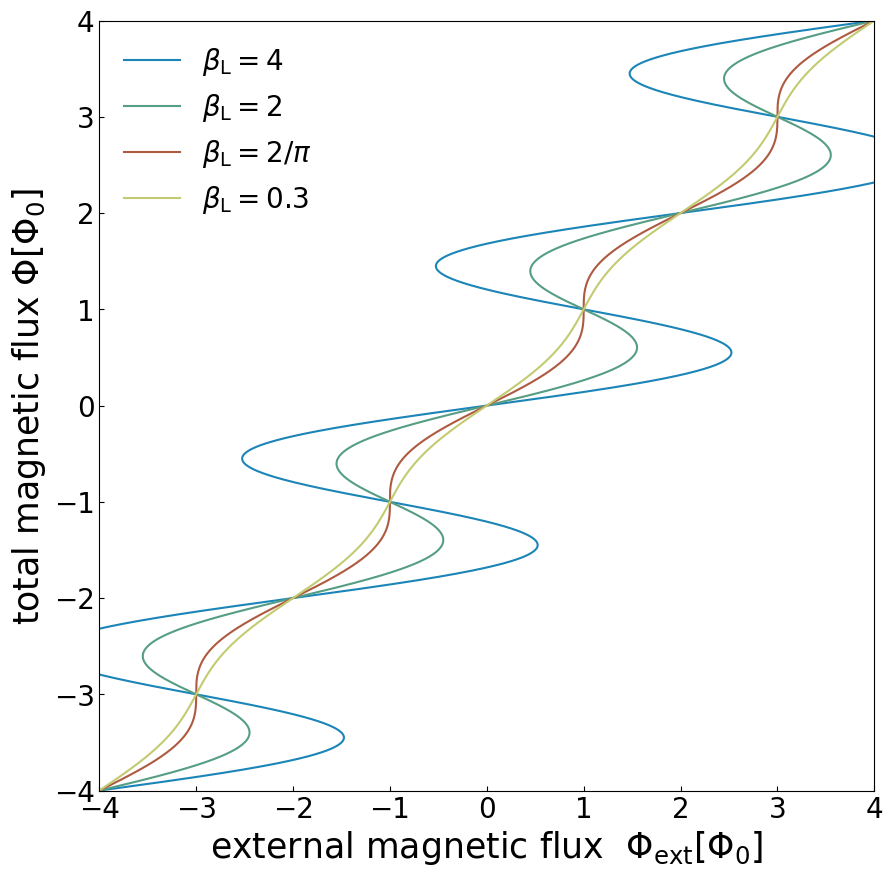

In [6]:
phi_0 = 2e-15
phi = np.linspace(-4,4,8000)*2e-15
def PhiExt(x,betaL):
        return x + phi_0*betaL*np.sin(np.pi*x/phi_0)/2
f, ax = plt.subplots()
ax.plot(PhiExt(phi,4)/phi_0, phi/phi_0, color='#1b85b8', label=r'$\beta_{\rm L}=4$')
ax.plot(PhiExt(phi,2)/phi_0, phi/phi_0, color='#559e83', label=r'$\beta_{\rm L}=2$')
ax.plot(PhiExt(phi,2/np.pi)/phi_0, phi/phi_0, color='#ae5a41', label=r'$\beta_{\rm L}=2/\pi$')
ax.plot(PhiExt(phi,0.3)/phi_0, phi/phi_0, color='#c3cb71', label=r'$\beta_{\rm L}=0.3$')
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ax.set_xlabel(r'external magnetic flux  $\Phi_{\mathrm{ext}}[\Phi_0]$')
ax.set_ylabel(r'total magnetic flux $\Phi[\Phi_0]$')
ax.legend()
plt.savefig('Phi_betaL.pdf')
plt.show()

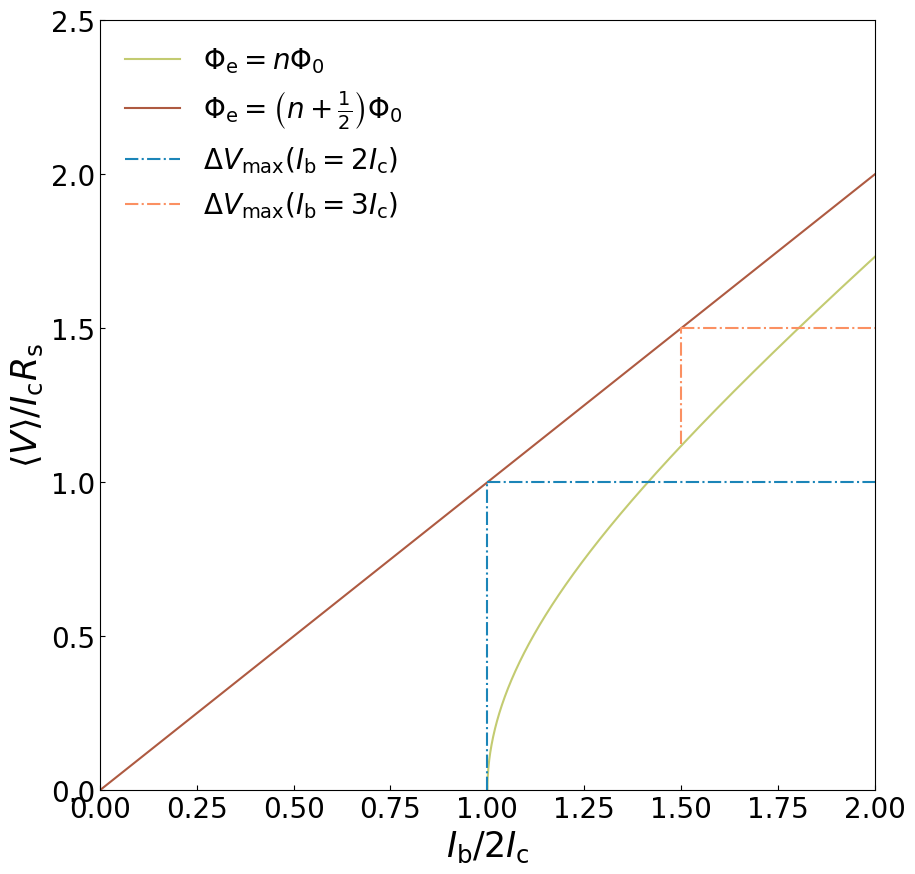

In [19]:
I = np.linspace(0,30,3000)*1e-6
phi = np.linspace(-2,2,8000)*phi_0
Ic = 6e-6
Rs = 6
def IV(x,phi_e):
        return Ic*Rs*np.sqrt((x/(2*Ic))**2-np.round(np.cos(np.pi*phi_e/phi_0), decimals=10)**2)
f, ax = plt.subplots()
ax.plot((I+2*Ic)/(2*Ic),IV(I+2*Ic,phi_0)/(Ic*Rs), color='#c3cb71', label=r'$\Phi_{\rm e}=n\Phi_0$')
ax.plot(I/(2*Ic),IV(I,0.5*phi_0)/(Ic*Rs), color='#ae5a41', label=r'$\Phi_{\rm e}=\left(n+\frac{1}{2}\right)\Phi_0$')
ax.set_ylim(0,2.5)
ax.set_xlim(0,2)
ax.set_ylabel(r'$\langle V \rangle / I_{\rm c}R_{\rm s}$')
ax.set_xlabel(r'$I_{\rm b} / 2I_{\rm c}$')
ax.axvline(x=1, ymin=0, ymax=0.4, label=r'$\Delta V_{\rm max}(I_{\rm b}=2I_{\rm c})$', ls='-.', c='#1b85b8')
ax.axhline(y=1, xmin=0.5, xmax=1, ls='-.', c='#1b85b8')
ax.axvline(x=1.5, ymin=0.45, ymax=0.6, label=r'$\Delta V_{\rm max}(I_{\rm b}=3I_{\rm c})$', ls='-.', c='#fb9062')
ax.axhline(y=1.5, xmin=0.75, xmax=1, ls='-.', c='#fb9062')
ax.legend(loc='upper left')
plt.savefig('IV.pdf')
plt.show()

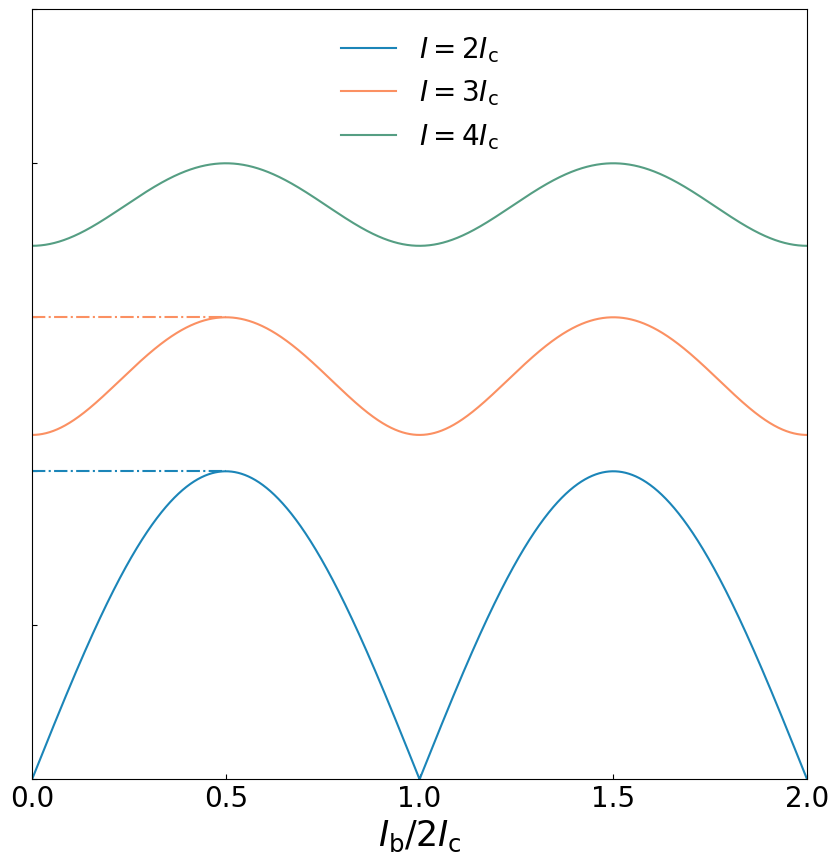

In [17]:
f, ax = plt.subplots()
ax.plot(phi/phi_0,IV(2*Ic,phi)/(Ic*Rs), color='#1b85b8', label=r'$I=2I_{\rm c}$')
ax.plot(phi/phi_0,IV(3*Ic,phi)/(Ic*Rs), color='#fb9062', label=r'$I=3I_{\rm c}$')
ax.plot(phi/phi_0,IV(4*Ic,phi)/(Ic*Rs), color='#559e83', label=r'$I=4I_{\rm c}$')

ax.set_ylim(0,2.5)
ax.set_xlim(0,2)
#ax.set_yticks([])
plt.tick_params(axis='y', which='both', bottom=False, top=False, left=True, right=False, labelbottom=False, labelleft=False)
plt.xticks(np.arange(0,2.5,0.5))
#ax.set_ylabel(r'$\langle V \rangle / I_{\rm c}R_{\rm s}$')
ax.set_xlabel(r'$I_{\rm b} / 2I_{\rm c}$')
#ax.axvline(x=0.5, ymin=0, ymax=0.4, ls='-.', c='#1b85b8')
ax.axhline(y=1, xmin=0, xmax=0.25, ls='-.', c='#1b85b8')
ax.axhline(y=1.5, xmin=0, xmax=0.25, ls='-.', c='#fb9062')
ax.legend(loc='upper center')
plt.savefig('VPhi.pdf')
plt.show()

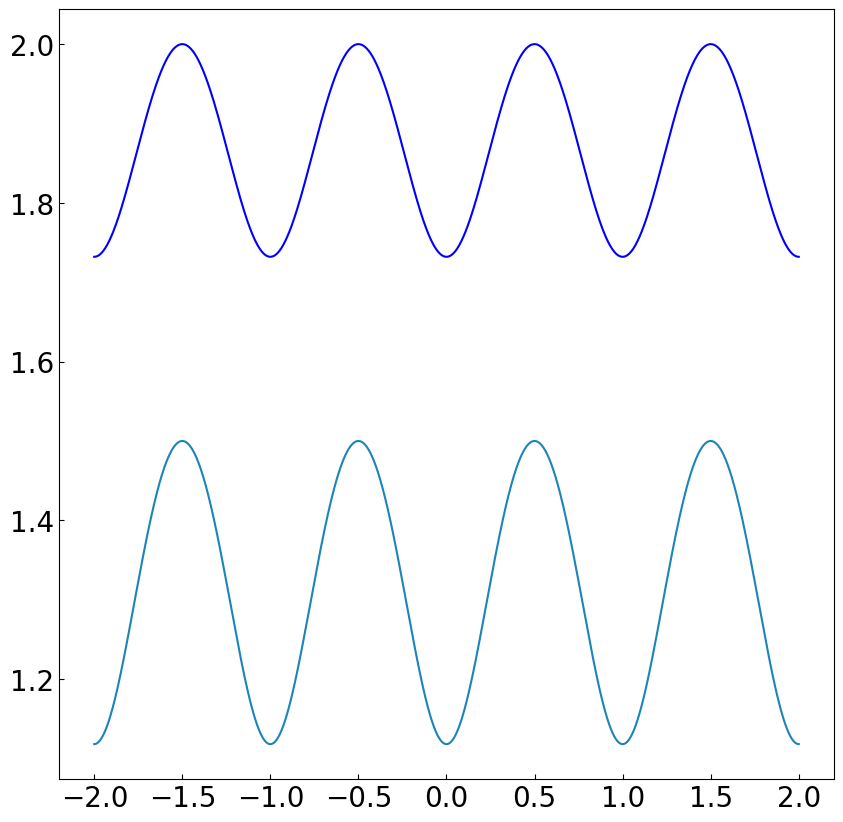

In [24]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#1b85b8', 'blue'])
f, ax = plt.subplots()
ax.plot(phi/phi_0,IV(3*Ic,phi)/(Ic*Rs), label=r'$I=3I_{\rm c}$')
ax.plot(phi/phi_0,IV(4*Ic,phi)/(Ic*Rs), label=r'$I=4I_{\rm c}$')

In [ ]:
IV(2*Ic,phi)/(Ic*Rs)

In [ ]:
2*np.pi*5.5e-6*11.4**2*0.23e-12/2e-15

In [ ]:
588/np.sqrt(6.5*0.8)

In [ ]:
330/np.sqrt(1.6*1.2)

In [ ]:
1/((3.4e-6)/2e-15)

In [ ]:
1/(2/5/3)

In [ ]:
1/2/5